In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
X = pd.read_csv("data_preNOx.csv")

In [4]:
y = X["NOx(GT)"]
X.drop(["NOx(GT)"], axis=1, inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 90109.5391 - mean_absolute_error: 233.2516 - val_loss: 80503.2422 - val_mean_absolute_error: 207.7970
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 72512.1016 - mean_absolute_error: 193.7225 - val_loss: 61508.6953 - val_mean_absolute_error: 179.7572
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 58865.8359 - mean_absolute_error: 178.4670 - val_loss: 53606.8750 - val_mean_absolute_error: 166.7413
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 49020.9961 - mean_absolute_error: 162.5323 - val_loss: 41719.7852 - val_mean_absolute_error: 146.8730
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 39334.4297 - mean_absolute_error: 144.2964 - val_loss: 30544.6191 - val_mean_absolute_error: 127.3881
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 27184.2148 - mean_absolute_error: 121.1670 - val_loss: 21936.7129 - val_mean_absolute_error: 108.6475
Epoch 7/100
209/209 ━━━━

In [31]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

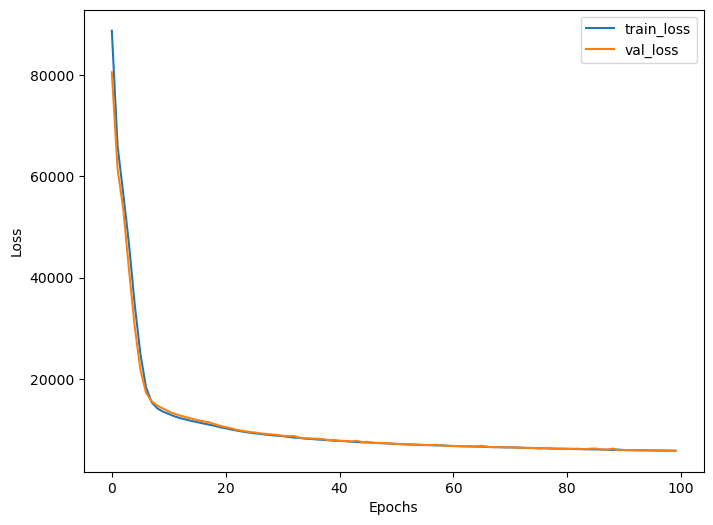

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


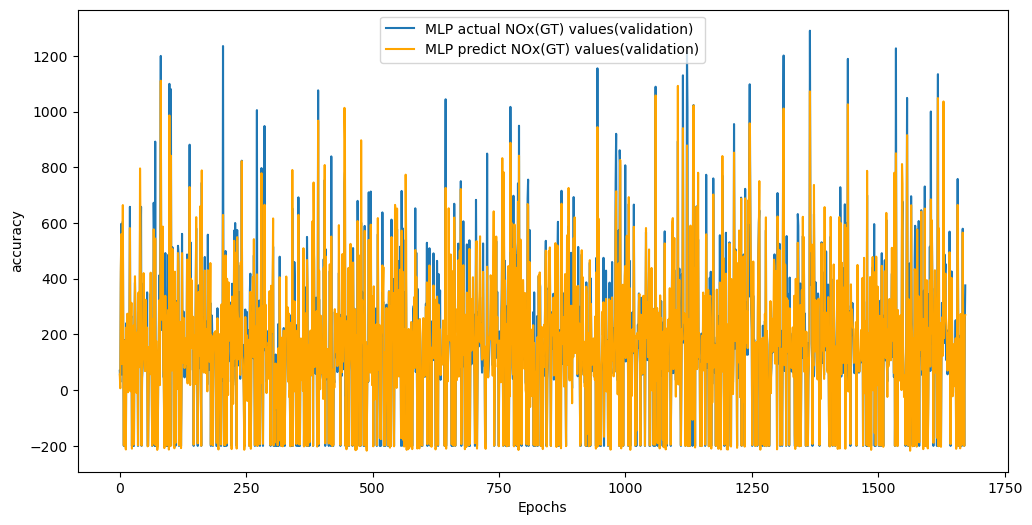

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(y_test), len(y_test)), y_test.values, label="MLP actual NOx(GT) values(validation)")
plt.plot(np.linspace(0, len(y_test), len(y_test)), model.predict(X_test), color="orange", label="MLP predict NOx(GT) values(validation)")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [43]:
RMSE = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
MAE = mean_absolute_error(y_test, model.predict(X_test))
RMSE, MAE, len(y_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


(76.77231186295619, 47.408880979300406, 1672)